In [1]:
#Age: age of the patient [years]
#Sex: sex of the patient [M: Male, F: Female]
#ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
#RestingBP: resting blood pressure [mm Hg]
#Cholesterol: serum cholesterol [mm/dl]
#FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
#RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
#MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
#ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
#Oldpeak: oldpeak = ST [Numeric value measured in depression]
#ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
#HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
#import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute
import tensorflow as tf

In [2]:
Heart = pd.read_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\DATS599\heart.csv")
Heart=Heart.loc[(Heart.RestingBP!=0)]
mean_A = Heart.loc[Heart['Cholesterol'] != 0, 'Cholesterol'].mean()
Heart['Cholesterol'] = Heart['Cholesterol'].replace(0, mean_A)
Heart.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207.0,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284.0,0,Normal,120,N,0.0,Up,0


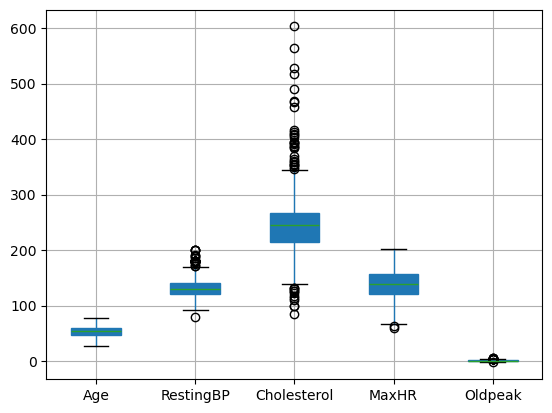

In [3]:
box=Heart.boxplot(column=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak'],patch_artist=True)
colors = ['skyblue','green']
for patch, color in zip(box.artists, colors):
    patch.set_facecolor(color) # kutunun doldurma rengini ayarlar
plt.show()

### Outlier Detection

In [5]:
#from scipy import stats
#from scipy.stats import zscore
#numeric_cols = Heart.select_dtypes(include=[np.number]).columns
#numeric_cols=numeric_cols.drop(['HeartDisease','FastingBS'])
#outlier_indices = []

#for col in numeric_cols:
#    Q1 = Heart[col].quantile(0.25)
#    Q3 = Heart[col].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#    outliers = (Heart[col] < lower_bound) | (Heart[col] > upper_bound)
#    outlier_indices.extend(Heart[outliers].index)

#outlier_indices = list(set(outlier_indices))
#Heart = Heart.drop(outlier_indices)

#z_scores = Heart.apply(zscore)
#threshold = 3
#df_clean = Heart[(np.abs(z_scores) < threshold).all(axis=1)]

In [4]:
Heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


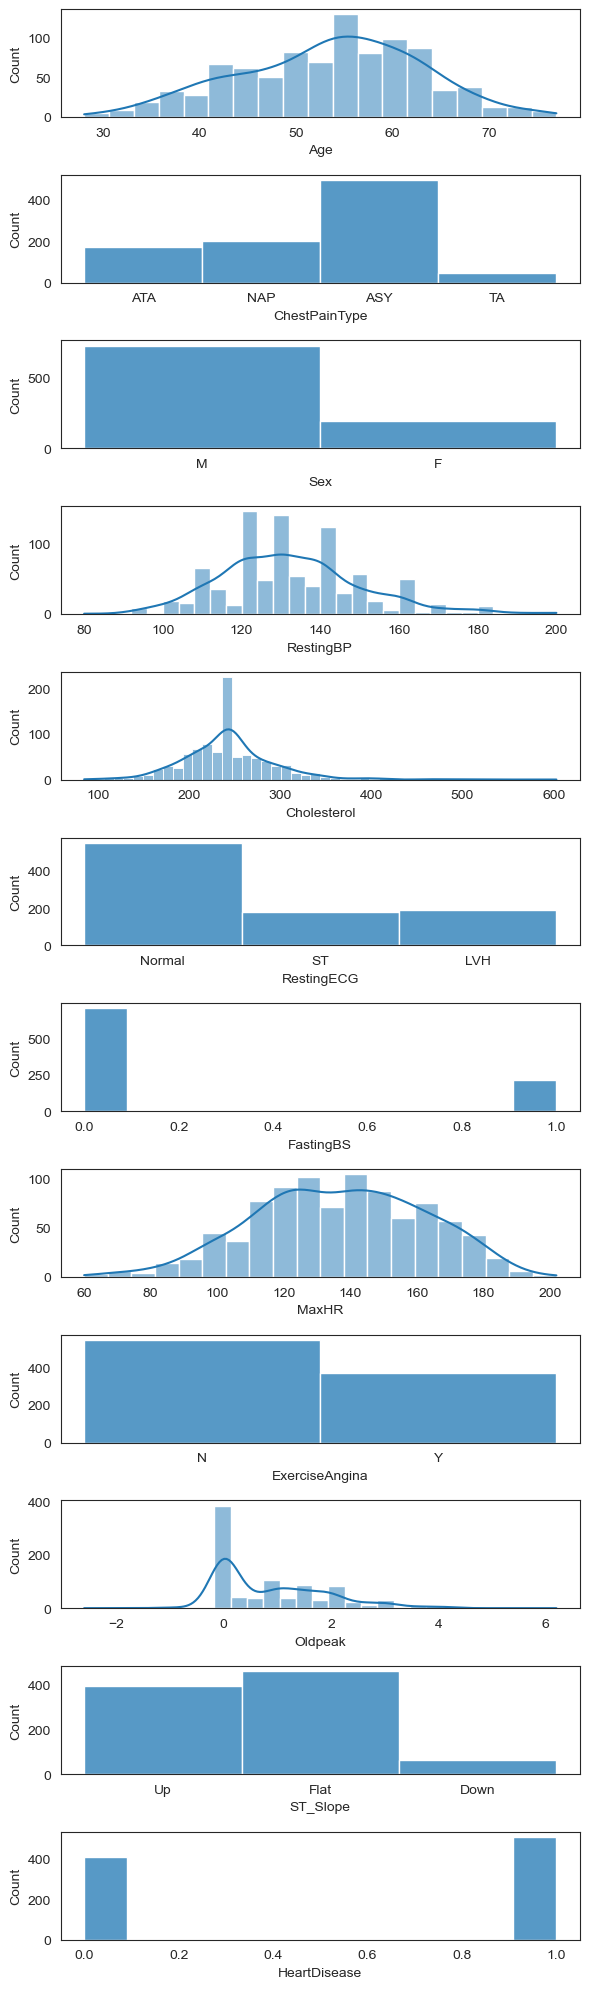

In [5]:
sns.set_style(style='white')
fig, axs = plt.subplots(12,figsize=(6,20))
sns.histplot(data=Heart, x='Age', kde=True, ax=axs[0])
sns.histplot(data=Heart, x='ChestPainType', kde=False, ax=axs[1])
sns.histplot(data=Heart, x='Sex', kde=False, ax=axs[2])
sns.histplot(data=Heart, x='RestingBP', kde=True, ax=axs[3])
sns.histplot(data=Heart, x='Cholesterol', kde=True, ax=axs[4])
sns.histplot(data=Heart, x='RestingECG', kde=False, ax=axs[5])
sns.histplot(data=Heart, x='FastingBS', kde=False, ax=axs[6])
sns.histplot(data=Heart, x='MaxHR', kde=True, ax=axs[7])
sns.histplot(data=Heart, x='ExerciseAngina', kde=False, ax=axs[8])
sns.histplot(data=Heart, x='Oldpeak', kde=True, ax=axs[9])
sns.histplot(data=Heart, x='ST_Slope', kde=False, ax=axs[10])
sns.histplot(data=Heart, x='HeartDisease', kde=False, ax=axs[11])
plt.tight_layout()
plt.show()

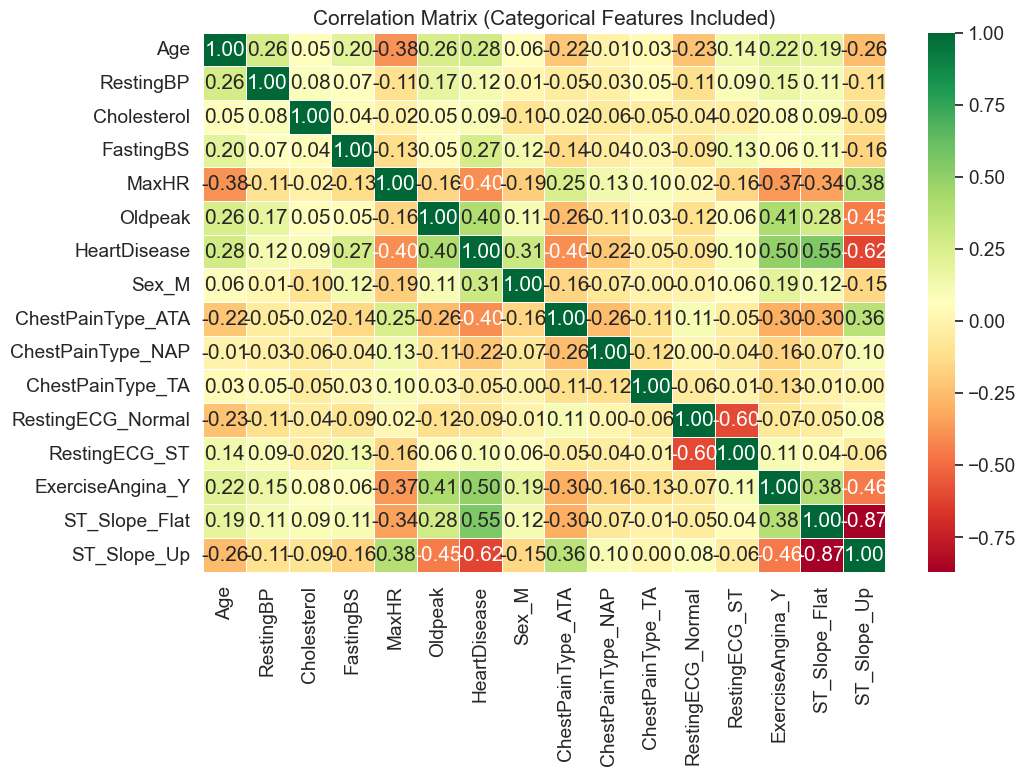

In [16]:
Heart_encoded = pd.get_dummies(Heart, drop_first=True)
sns.set(font_scale = 1.25)
correlation_matrix = Heart_encoded.corr()
plt.figure(figsize=(11, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Matrix (Categorical Features Included)")
plt.show()

In [17]:
#Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaled_features = Heart.copy()
col_names = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.500000,0.393822,0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.666667,0.183398,0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.416667,0.382239,0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.483333,0.249035,0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.583333,0.212355,0,Normal,0.436620,N,0.295455,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,M,TA,0.250000,0.345560,0,Normal,0.507042,N,0.431818,Flat,1
914,0.816327,M,ASY,0.533333,0.208494,1,Normal,0.570423,N,0.681818,Flat,1
915,0.591837,M,ASY,0.416667,0.088803,0,Normal,0.387324,Y,0.431818,Flat,1
916,0.591837,F,ATA,0.416667,0.291506,0,LVH,0.802817,N,0.295455,Flat,1


In [19]:
from sklearn.preprocessing import OneHotEncoder
onhe = OneHotEncoder(drop="if_binary",sparse_output=False, handle_unknown= "ignore")
enco = onhe.fit_transform(scaled_features[["Sex","ChestPainType","RestingECG","FastingBS","ExerciseAngina","ST_Slope"]])
enco = pd.DataFrame(enco, columns= onhe.get_feature_names_out(["Sex","ChestPainType","RestingECG","FastingBS","ExerciseAngina","ST_Slope"]))

Heart1=pd.concat([scaled_features.reset_index(), enco], axis = 1)
Heart1=Heart1.drop(['index','Sex','ChestPainType','RestingECG','FastingBS','ExerciseAngina','ST_Slope'],axis=1)
Heart1

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,FastingBS_1,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.500000,0.393822,0.788732,0.295455,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.428571,0.666667,0.183398,0.676056,0.409091,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.183673,0.416667,0.382239,0.267606,0.295455,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.408163,0.483333,0.249035,0.338028,0.465909,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.583333,0.212355,0.436620,0.295455,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.346939,0.250000,0.345560,0.507042,0.431818,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
913,0.816327,0.533333,0.208494,0.570423,0.681818,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,0.591837,0.416667,0.088803,0.387324,0.431818,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
915,0.591837,0.416667,0.291506,0.802817,0.295455,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Creating  and test dataset
X=Heart1.drop(columns=['HeartDisease'])
y=Heart1['HeartDisease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

### Feature Selection and One of the trial

In [27]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
model = SVC(kernel="linear")
no_features = 15
rfe = RFE(model, n_features_to_select=no_features)
rfe = rfe.fit(X, y.to_numpy())
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [28]:
LGB = lgb.LGBMClassifier(max_depth=10,num_leaves=10,n_estimators=20,random_state=0,learning_rate=0.1,reg_alpha = 0.1,
                        reg_lambda = 0.5,subsample= 0.1,tree_learner = "voting",colsample_bytree = 0.43)
LGB.fit(X_train_rfe, y_train)
pred_lgb = LGB.predict(X_test_rfe) #make prediction on test set

[LightGBM] [Info] Number of positive: 328, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.534202 -> initscore=0.137022
[LightGBM] [Info] Start training from score 0.137022
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


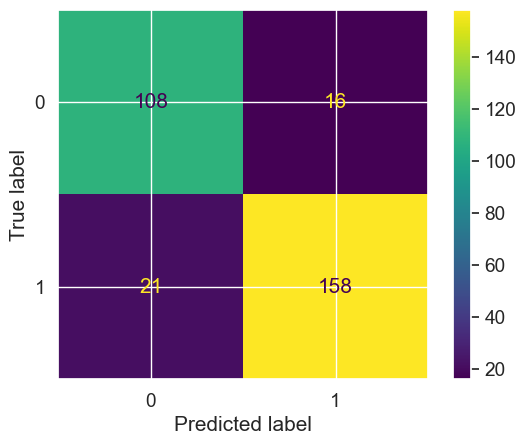

True Negatives:  108
False Positives:  16
False Negatives:  21
True Positives:  158
Accuracy: 0.8778877887788779
Precision: 0.9080459770114943
F1: 0.8951841359773371
MCCC: 0.7494405408038276


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, matthews_corrcoef
cm = confusion_matrix(y_test, pred_lgb, labels=LGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=LGB.classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = pred_lgb, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_lgb = accuracy_score(y_test,pred_lgb)
print("Accuracy:", accuray_lgb)
precision_lgb = precision_score(y_test, pred_lgb)
print("Precision:", precision_lgb)
f1_lgb=f1_score(y_test, pred_lgb)
print("F1:", f1_lgb)
mcc_lgb = matthews_corrcoef(y_test, pred_lgb)
print("MCCC:", mcc_lgb)

In [39]:
LGB = lgb.LGBMClassifier(max_depth=10,num_leaves=10,n_estimators=20,random_state=0,learning_rate=0.1,reg_alpha = 0.1,
                        reg_lambda = 0.5,subsample= 0.1,tree_learner = "voting",colsample_bytree = 0.43,verbose=-1)
LGB.fit(X_train, y_train)
pred_lgb = LGB.predict(X_test) #make prediction on test set

In [40]:
from sklearn.model_selection import GridSearchCV
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='accuracy',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=1
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    return fitted_model, pred

In [41]:
import time
import warnings
import logging

warnings.filterwarnings("ignore")
logging.getLogger("lightgbm").setLevel(logging.ERROR)

model = LGB
start=time.time()
param_grid = {'max_depth': [5,7,10,14,20],
             'num_leaves':[10,20,30,50,100],
             'n_estimators':[10,20,40,50],
              'learning_rate':[0.05,0.1,0.15,0.2]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()
print(model.best_score_)
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
0.876222844195655
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 40, 'num_leaves': 20}
Time Taken with GridSearchCV: 12.68460726737976


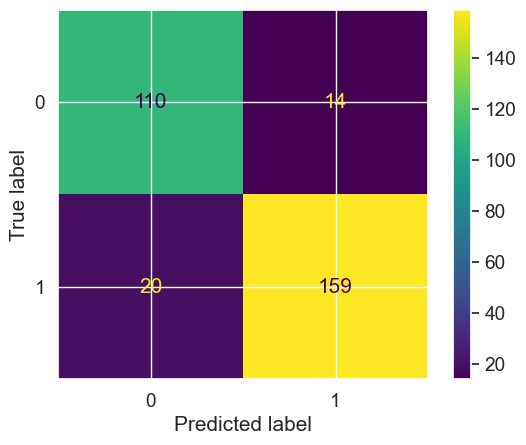

True Negatives:  110
False Positives:  14
False Negatives:  20
True Positives:  159
Accuracy: 0.8877887788778878
Precision: 0.9190751445086706
F1: 0.9034090909090909
MCCC: 0.7702802887598925


In [42]:
#LGB RESULTS
cm = confusion_matrix(y_test, pred_lgb, labels=LGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=LGB.classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = pred_lgb, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_lgb = accuracy_score(y_test,pred_lgb)
print("Accuracy:", accuray_lgb)
precision_lgb = precision_score(y_test, pred_lgb)
print("Precision:", precision_lgb)
f1_lgb=f1_score(y_test, pred_lgb)
print("F1:", f1_lgb)
mcc_lgb = matthews_corrcoef(y_test, pred_lgb)
print("MCCC:", mcc_lgb)

from lightgbm import plot_tree
i=0
while i<20:
    lgb.plot_tree(LGB,figsize=(20,6),tree_index=i,dpi=300)
    plt.gcf().set_size_inches(25, 15)
    plt.show()
    i+=1

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LGB, X, y, cv=10, scoring='accuracy')
print("Accuracy: ", scores)

Accuracy:  [0.89130435 0.95652174 0.79347826 0.93478261 0.86956522 0.86956522
 0.85869565 0.79120879 0.74725275 0.78021978]


In [44]:
#SVM
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

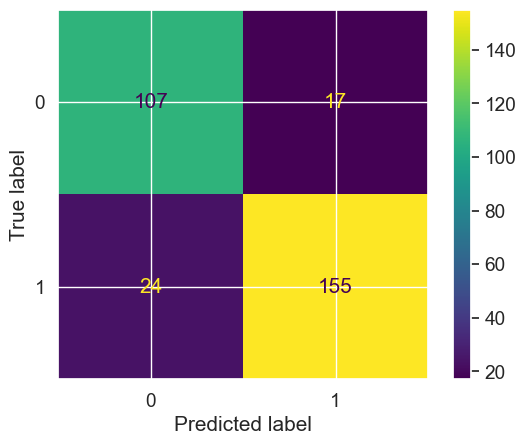

True Negatives:  107
False Positives:  17
False Negatives:  24
True Positives:  155
Accuracy: 0.8646864686468647
Precision: 0.9011627906976745
F1: 0.8831908831908832
MCCC: 0.723370437462303


In [45]:
#SVM Results
cm = confusion_matrix(y_test, svm_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = svm_pred, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_svm = accuracy_score(y_test,svm_pred)
print("Accuracy:", accuray_svm)
precision_svm = precision_score(y_test, svm_pred)
print("Precision:", precision_svm)
f1_svm=f1_score(y_test, svm_pred)
print("F1:", f1_svm)
mcc_svm = matthews_corrcoef(y_test, svm_pred)
print("MCCC:", mcc_svm)

In [46]:
#XGBOOST
import xgboost as xg
xgb = xg.XGBClassifier(n_estimators = 12, seed = 10,max_depth=5,booster='gbtree',
                       min_child_weight =5,subsample =0.5,objective='binary:logistic',reg_alpha = 0.1,reg_lambda = 0.5
                      ,colsample_bytree=0.5)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [47]:
import time
model = xgb
start=time.time()
param_grid = {'max_depth': [5,7,10,14,20],
             'seed':[8,10,15],
             'min_child_weight':[3,5,10,15],
              'subsample':[0.5,1]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()
#Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
nan
{'max_depth': 7, 'min_child_weight': 5, 'seed': 8, 'subsample': 1}
Time Taken with GridSearchCV: 2.4408276081085205


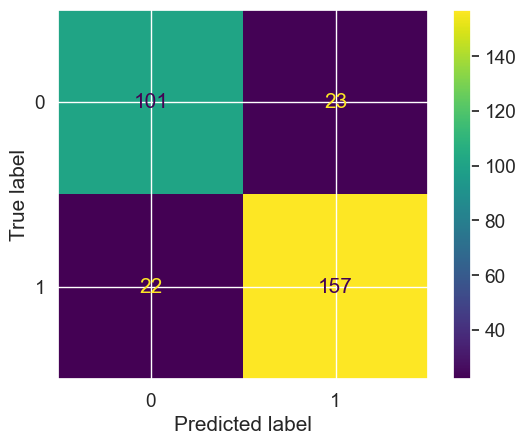

True Negatives:  101
False Positives:  23
False Negatives:  22
True Positives:  157
Accuracy: 0.8514851485148515
Precision: 0.8722222222222222
F1: 0.8746518105849582
MCCC: 0.6924852149640316


In [48]:
#XGB Results
cm = confusion_matrix(y_test, pred_xgb, labels=xgb .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xgb .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = pred_xgb, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_xgb = accuracy_score(y_test, pred_xgb)
print("Accuracy:", accuray_xgb)
precision_xgb = precision_score(y_test, pred_xgb)
print("Precision:", precision_xgb)
f1_xgb=f1_score(y_test, pred_xgb)
print("F1:", f1_xgb)
mcc_xgb = matthews_corrcoef(y_test, pred_xgb)
print("MCCC:", mcc_xgb)

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
print("Accuracy: ", scores)

Accuracy:  [0.89130435 0.91304348 0.82608696 0.88043478 0.85869565 0.86956522
 0.85869565 0.79120879 0.74725275 0.76923077]


from xgboost import plot_tree
import matplotlib.pyplot as plt
i=0
while i<12:
    plot_tree(xgb,num_trees=i)
    plt.gcf().set_size_inches(25, 15)
    plt.show()
    i+=1

In [51]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DCS= DecisionTreeClassifier(random_state=1,splitter='best',max_depth=4,min_samples_split=7)
DCS = DCS.fit(X_train,y_train)
Dcs_pred = DCS.predict(X_test)

In [52]:
import time
model = DCS
start=time.time()
param_grid = {'max_depth': [4,7,10,14,20,25,50],
             'splitter':['best','random'],
             'min_samples_split':[2,3,7,10]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()
print(model.best_score_)
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.8371451419432226
{'max_depth': 4, 'min_samples_split': 2, 'splitter': 'random'}
Time Taken with GridSearchCV: 0.6142027378082275


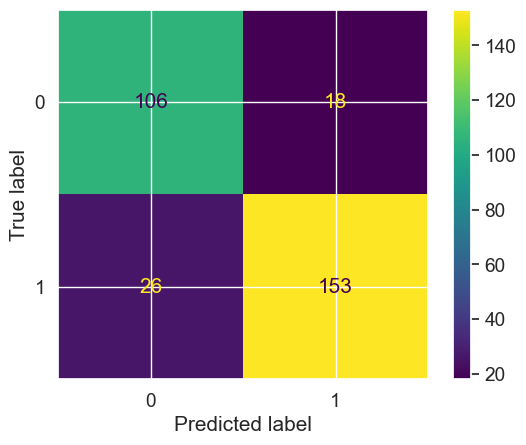

True Negatives:  106
False Positives:  18
False Negatives:  26
True Positives:  153
Accuracy: 0.8547854785478548
Precision: 0.8947368421052632
F1: 0.8742857142857143
MCCC: 0.7036524096717953


In [53]:
#Decision Tree Results
cm = confusion_matrix(y_test, Dcs_pred, labels=DCS .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=DCS .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = Dcs_pred, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_dcs = accuracy_score(y_test, Dcs_pred)
print("Accuracy:", accuray_dcs)
precision_dcs = precision_score(y_test, Dcs_pred)
print("Precision:", precision_dcs)
f1_DCS=f1_score(y_test, Dcs_pred)
print("F1:", f1_DCS)
mcc_DCS = matthews_corrcoef(y_test, Dcs_pred)
print("MCCC:", mcc_DCS)

In [54]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=1,max_depth=4)
RFC.fit(X_train,y_train)
RFC_pred = RFC.predict(X_test)

In [55]:
import time
model = RFC
start=time.time()
param_grid = {'n_estimators': [80,100],
             'criterion':['gini','entropy','log_loss'],
             'max_depth':[4,5,6]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()
print(model.best_score_)
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.866453418632547
{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100}
Time Taken with GridSearchCV: 1.7975573539733887


from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(RFC.estimators_[0], out_file=None, feature_names=X_train.columns, class_names=["1","0"], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png")
Image(graph.create_png())


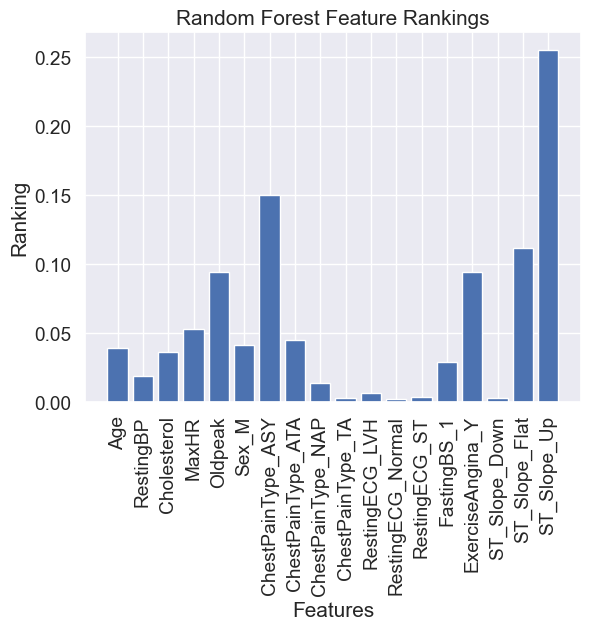

In [57]:
import matplotlib.pyplot as plt

feature_importances = RFC.feature_importances_

plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.title("Random Forest Feature Rankings")
plt.show()

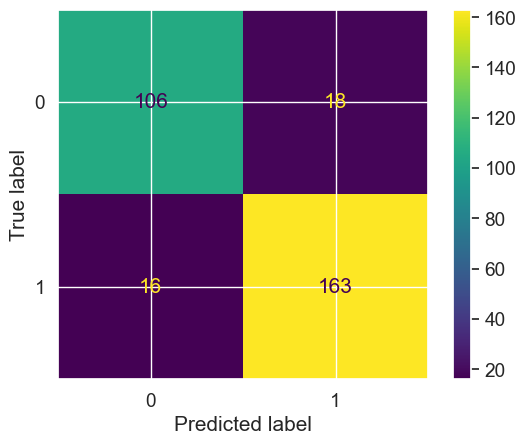

True Negatives:  106
False Positives:  18
False Negatives:  16
True Positives:  163
Accuracy: 0.8877887788778878
Precision: 0.9005524861878453
F1: 0.9055555555555556
MCCC: 0.7674265464465286


In [58]:
#RandomForest Results
cm = confusion_matrix(y_test, RFC_pred, labels=RFC .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=RFC .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = RFC_pred, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_rfc = accuracy_score(y_test, RFC_pred)
print("Accuracy:", accuray_rfc)
precision_Rfc = precision_score(y_test, RFC_pred)
print("Precision:", precision_Rfc)
f1_rfc=f1_score(y_test, RFC_pred)
print("F1:", f1_rfc)
mcc_rfc = matthews_corrcoef(y_test, RFC_pred)
print("MCCC:", mcc_rfc)

In [59]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced',random_state=1,penalty='l2')
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)

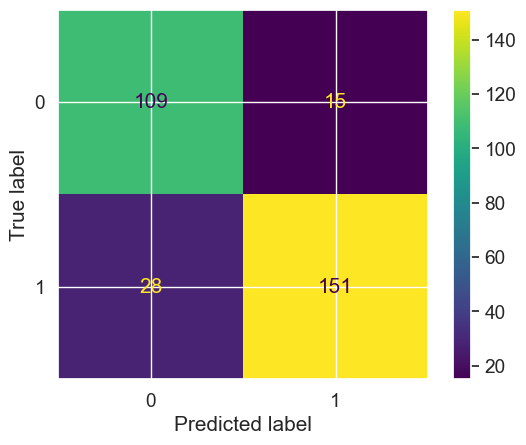

True Negatives:  109
False Positives:  15
False Negatives:  28
True Positives:  151
Accuracy: 0.858085808580858
Precision: 0.9096385542168675
F1: 0.8753623188405797
MCCC: 0.713880635722181


In [60]:
#Logistic Regression Results
cm = confusion_matrix(y_test, log_pred, labels=logreg .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=logreg .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = log_pred, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_log = accuracy_score(y_test, log_pred)
print("Accuracy:", accuray_log)
precision_Log = precision_score(y_test, log_pred)
print("Precision:", precision_Log)
f1_log=f1_score(y_test, log_pred)
print("F1:", f1_log)
mcc_log = matthews_corrcoef(y_test, log_pred)
print("MCCC:", mcc_log)

In [61]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_predicted = NB.predict(X_test)

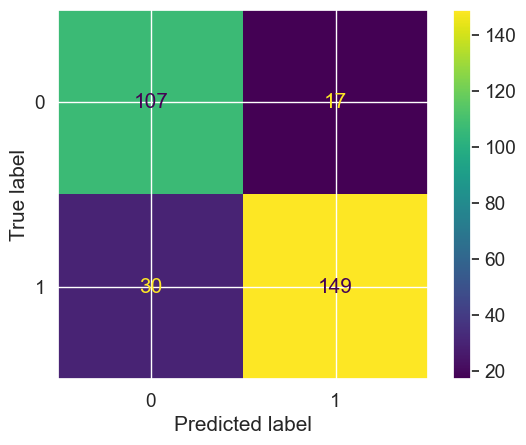

True Negatives:  107
False Positives:  17
False Negatives:  30
True Positives:  149
Accuracy: 0.8448844884488449
Precision: 0.8975903614457831
F1: 0.863768115942029
MCCC: 0.6869081520730981


In [62]:
#Gaussian Naive Bayes Results
cm = confusion_matrix(y_test, NB_predicted, labels=NB .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=NB .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = NB_predicted, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_nb = accuracy_score(y_test, NB_predicted)
print("Accuracy:", accuray_nb)
precision_NB = precision_score(y_test, NB_predicted)
print("Precision:", precision_NB)
f1_nb=f1_score(y_test, NB_predicted)
print("F1:", f1_nb)
mcc_nb = matthews_corrcoef(y_test, NB_predicted)
print("MCCC:", mcc_nb)

In [69]:
#Neural Network
#Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def build_custom_model(
    input_dim=X_train.shape[1],
    hidden_units_1=64,
    hidden_units_2=32,
    hidden_units_3=16,
    dropout_1=0.2,
    dropout_2=0.1,
    dropout_3=0.1,
    activation='relu',
    optimizer='adam',
    learning_rate=None
):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(hidden_units_1, activation=activation))
    model.add(Dropout(dropout_1))
    model.add(Dense(hidden_units_2, activation=activation))
    model.add(Dropout(dropout_2))
    model.add(Dense(hidden_units_3, activation=activation))
    model.add(Dropout(dropout_3))
    model.add(Dense(1, activation='sigmoid'))  # for binary classification

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['F1Score','Accuracy']
    )
    return model


# early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

model = build_custom_model()
history = model.fit(X_train2, y_train2,
                     validation_data = (X_val, y_val),
                     callbacks=[early_stop],
                     epochs=50,
                     batch_size=32,
                     verbose=1)
  
pred_NN = model.predict(X_test)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - Accuracy: 0.5957 - F1Score: 0.6606 - loss: 0.6676 - val_Accuracy: 0.8130 - val_F1Score: 0.6984 - val_loss: 0.6162
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.7934 - F1Score: 0.6645 - loss: 0.6026 - val_Accuracy: 0.8049 - val_F1Score: 0.6984 - val_loss: 0.5474
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.8255 - F1Score: 0.7038 - loss: 0.5323 - val_Accuracy: 0.8049 - val_F1Score: 0.6984 - val_loss: 0.4759
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.8005 - F1Score: 0.7105 - loss: 0.4716 - val_Accuracy: 0.8130 - val_F1Score: 0.6984 - val_loss: 0.4147
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.8496 - F1Score: 0.7102 - loss: 0.4046 - val_Accuracy: 0.8374 - val_F1Score: 0.6984 - val_loss: 0.4004
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.8316 - F1Score: 0.6809 - loss: 0.3718 - val_Accuracy: 0.8049 - val_F1Score: 0.6984 - val_loss: 0.4034
Epo

,Metric,Value
0,Accuracy,0.871287
1,Precision,0.911765
2,Recall,0.865922
3,F1-Score,0.888252
4,AUC-ROC,0.872477
5,Log Loss,4.639282
6,MCC,0.738102


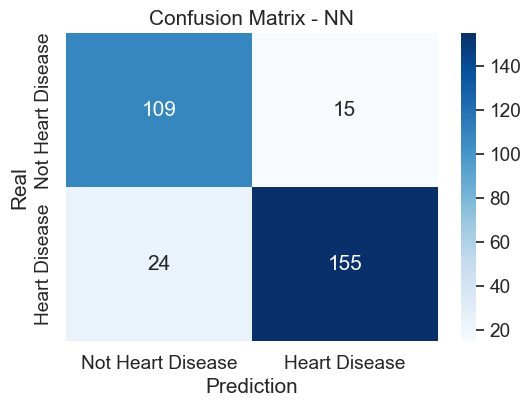

In [72]:
pred_NN = (pred_NN > 0.5).astype(int)
metrics_dict_keras = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Log Loss", "MCC"],
    "Value": [
        accuracy_score(y_test, pred_NN),
        precision_score(y_test, pred_NN),
        recall_score(y_test, pred_NN),
        f1_score(y_test, pred_NN),
        roc_auc_score(y_test, pred_NN),
        log_loss(y_test, pred_NN),
        matthews_corrcoef(y_test, pred_NN)
    ]
}

metrics_df_keras = pd.DataFrame(metrics_dict_keras)
display(metrics_df_keras)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_NN), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Heart Disease", "Heart Disease"], yticklabels=["Not Heart Disease", "Heart Disease"])
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title("Confusion Matrix - NN")
plt.show()

In [73]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,weights='distance',leaf_size=10)
knn.fit(X_train, y_train)
KNN_pred = knn.predict(X_test)

In [74]:
import time
model = knn
start=time.time()
param_grid = {'n_neighbors': [2,3,5,8,10],
             'weights':['distance','uniform'],
             'leaf_size':[10,20,30,50,100]}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5)
end = time.time()
print(model.best_score_)
print(model.best_params_)
print("Time Taken with GridSearchCV:", end-start)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8566440090630415
{'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}
Time Taken with GridSearchCV: 4.6398937702178955


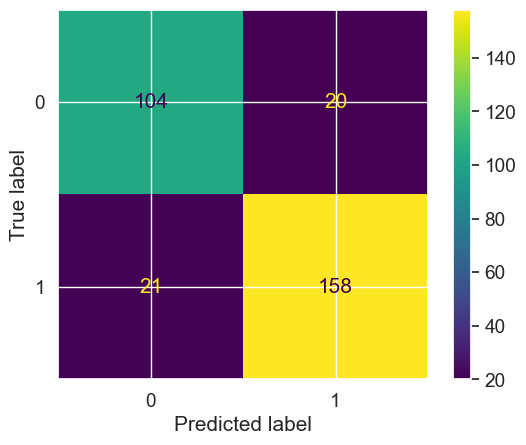

True Negatives:  104
False Positives:  20
False Negatives:  21
True Positives:  158
Accuracy: 0.8646864686468647
Precision: 0.8876404494382022
F1: 0.8851540616246498
MCCC: 0.7205153137669609


In [75]:
cm = confusion_matrix(y_test, KNN_pred, labels=knn .classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=knn .classes_)
disp.plot()
plt.show()
tp, fn, fp, tn = confusion_matrix(y_true = y_test, y_pred = KNN_pred, labels=[1,0]).reshape(-1)
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

accuray_knn = accuracy_score(y_test, KNN_pred)
print("Accuracy:", accuray_knn)
precision_kNN = precision_score(y_test, KNN_pred)
print("Precision:", precision_kNN)
f1_knn=f1_score(y_test, KNN_pred)
print("F1:", f1_knn)
mcc_knn = matthews_corrcoef(y_test, KNN_pred)
print("MCCC:", mcc_knn)